# medical cost

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv('/content/insurance.csv')
print('m, n: ',df.shape)
df.head()

m, n:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(5.300000000000004, 0.5, 'Charges')

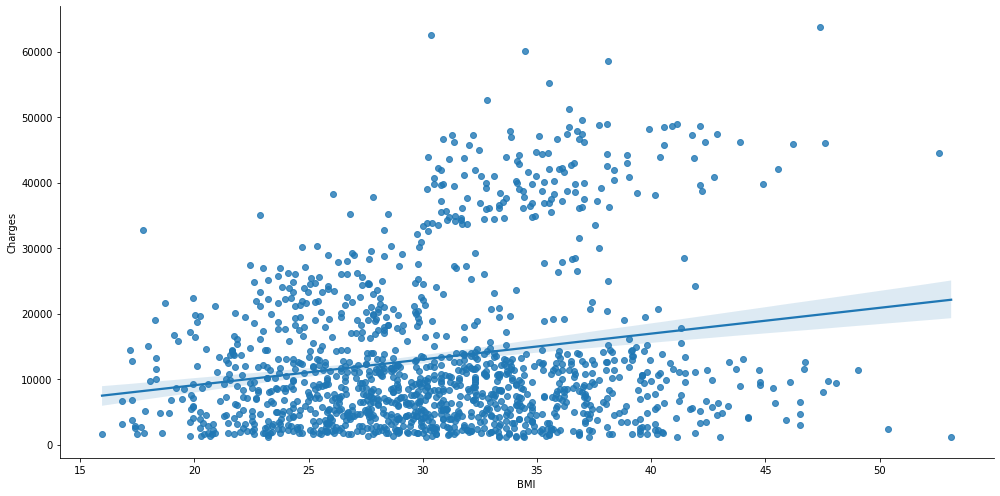

In [178]:
sns.lmplot(x='bmi', y='charges', data=df, aspect=2, height=7)
plt.xlabel('BMI')
plt.ylabel('Charges')

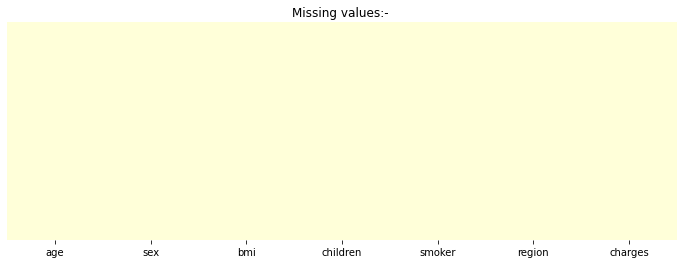

In [179]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.title('Missing values:- ');

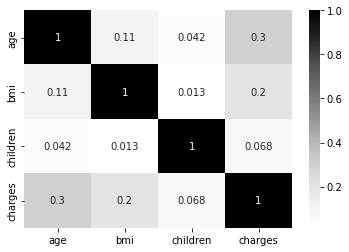

In [180]:
sns.heatmap(df.corr(), cmap='Greys', annot=True)

Text(0.5, 1.0, 'Insurance charges in $log$')

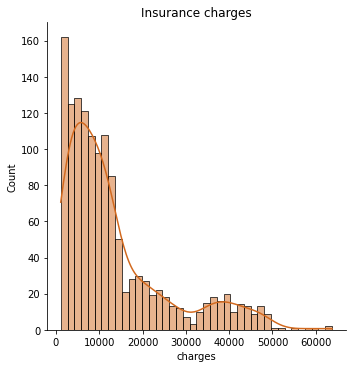

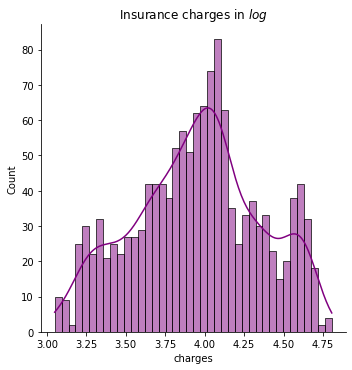

In [181]:
sns.displot(data=df.charges,bins=40,color='chocolate', kde='True')
plt.title('Insurance charges')

sns.displot(np.log10(df.charges),bins=40,color='purple', kde='True')
plt.title('Insurance charges in $log$')

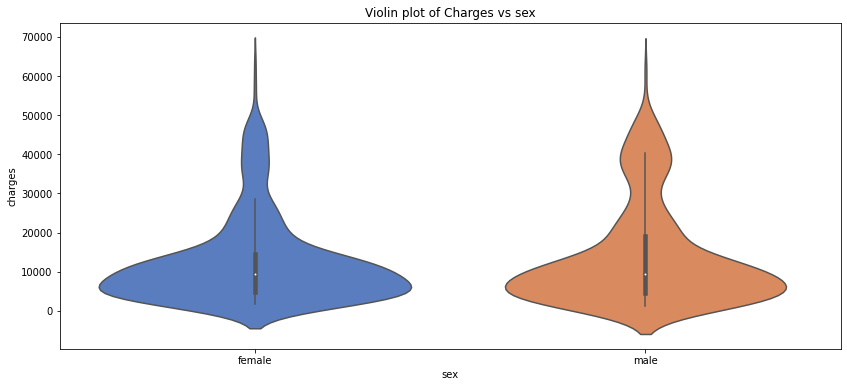

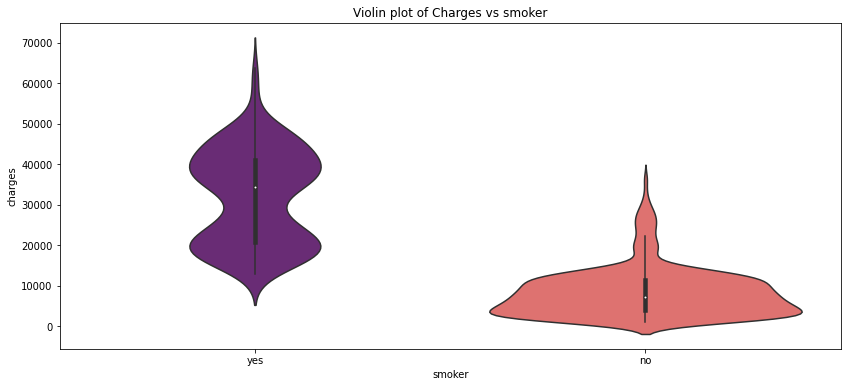

In [182]:
plt.figure(figsize=(14,6))
ax = sns.violinplot(x='sex', y='charges', data=df, palette='muted')
plt.title('Violin plot of Charges vs sex')
plt.show()
plt.figure(figsize=(14,6))
ax = sns.violinplot(x='smoker', y='charges', data=df, palette='magma')
plt.title('Violin plot of Charges vs smoker');

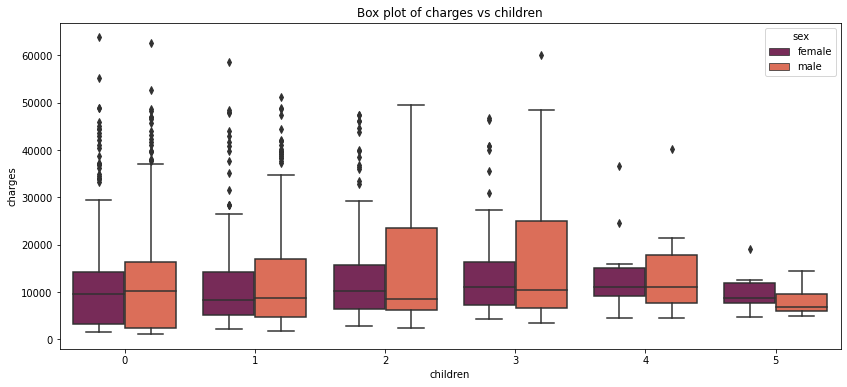

In [183]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rocket')
plt.title('Box plot of charges vs children');

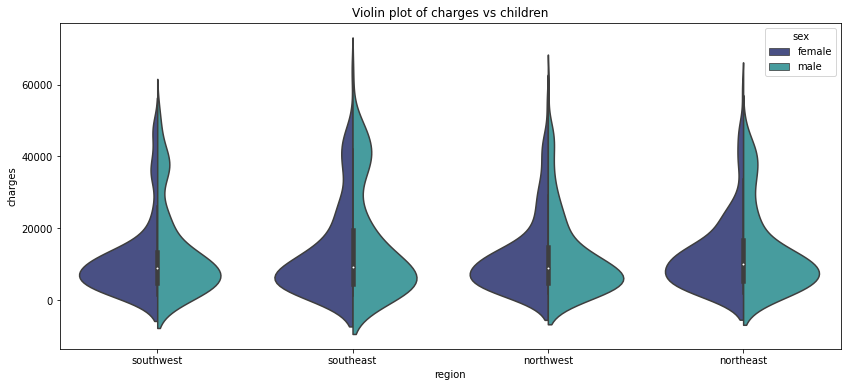

In [184]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='mako',split=True)
plt.title('Violin plot of charges vs children');

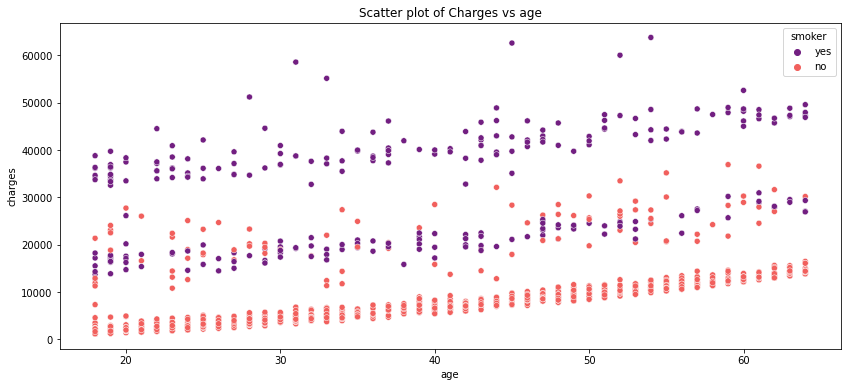

Text(0.5, 1.0, 'Scatter plot')

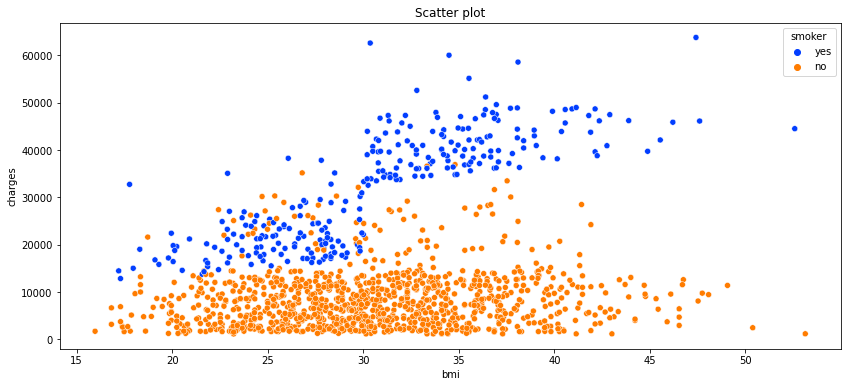

In [185]:
f = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker')
plt.title('Scatter plot of Charges vs age')
plt.show()
f = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='bright',hue='smoker')
plt.title('Scatter plot')

In [186]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
categorical_values = ['sex','children', 'smoker', 'region']
df_enc = pd.get_dummies(data = df, columns = categorical_values, drop_first =True, prefix = 'OHE', prefix_sep='_', dtype='int8')

In [188]:
print('Columns previously: ',df.columns.values)
print('m, n (no. of rows and columns) previously: ',df.shape)
print('\nColumns after dummy variable encoding: ',df_enc.columns.values)
print('new m, n: ',df_enc.shape)

Columns previously:  ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']
m, n (no. of rows and columns) previously:  (1338, 7)

Columns after dummy variable encoding:  ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']
new m, n:  (1338, 13)


In [189]:
df_enc['charges'] = np.log(df_enc['charges'])

In [190]:
from sklearn.model_selection import train_test_split
X = df_enc.drop('charges', axis=1)
y = df_enc['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [191]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [192]:
#model
theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T,X_train_0)), np.matmul(X_train_0.T,y_train)) 
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [193]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.052768,7.052768
1,theta_1,age,0.033265,0.033265
2,theta_2,bmi,0.013865,0.013865
3,theta_3,OHE_male,-0.067809,-0.067809
4,theta_4,OHE_1,0.142511,0.142511
5,theta_5,OHE_2,0.278529,0.278529
6,theta_6,OHE_3,0.254834,0.254834
7,theta_7,OHE_4,0.500875,0.500875
8,theta_8,OHE_5,0.421956,0.421956
9,theta_9,OHE_yes,1.550229,1.550229


In [194]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)
# MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]
# R^2
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('mean square error: ',J_mse)
print('R^2: ',R_square)

mean square error:  0.17673797181693157
R^2:  0.8027551570299635


In [195]:
# sklearn regression
y_pred_sk = lin_reg.predict(X_test)
# MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
# R^2
R_square_sk = lin_reg.score(X_test,y_test)
print('mean square error: ',J_mse_sk)
print('R^2: ',R_square_sk)

mean square error:  0.1767379718169321
R^2:  0.8027551570299629


Text(0.5, 1.0, 'Actual Vs Predicted')

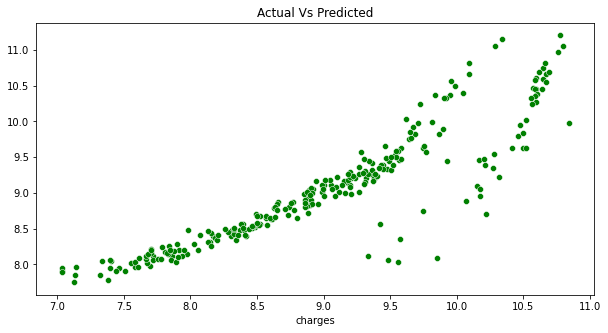

In [196]:
# Model Validation
# Check for Linearity
f = plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_sk, color='g')
plt.title('Actual Vs Predicted')

<Figure size 1008x432 with 0 Axes>

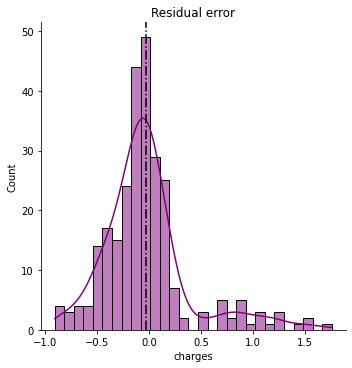

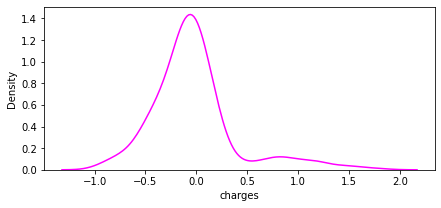

In [197]:
# Check for Residual normality & mean
f = plt.figure(figsize=(14,6))
sns.displot((y_test - y_pred_sk), color='purple', kde=True)
plt.axvline((y_test - y_pred_sk).mean(), color='black', linestyle='-.')
plt.title('Residual error');


f = plt.figure(figsize=(7,3))
sns.kdeplot((y_test - y_pred_sk), color='magenta')

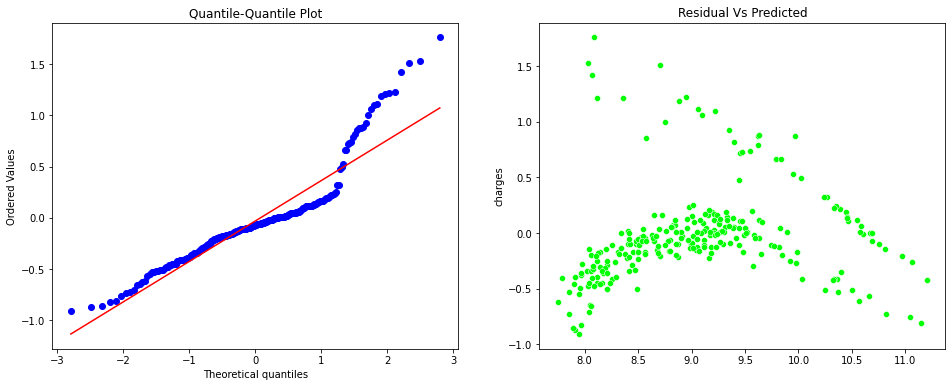

In [198]:
# Check for Multivariate Normality using Q-Q probablity plot
f,ax = plt.subplots(1,2,figsize=(16,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk), fit=True, plot=ax[0])
ax[0].set_title('Quantile-Quantile Plot')

#Check for Homoscedasticity
sns.scatterplot(x = y_pred_sk, y = (y_test - y_pred_sk), ax = ax[1], color='lime')
ax[1].set_title('Residual Vs Predicted');

In [199]:
# Check for Multicollinearity by Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

5.069841040923474

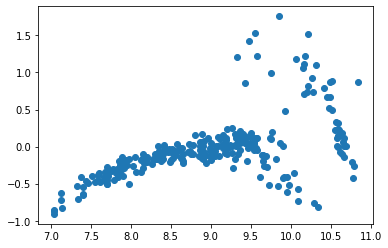

In [200]:
plt.scatter(y_test,(y_test - y_pred_sk))

In [203]:
import pickle
file = open('Lin_reg_model.pkl','wb')
pickle.dump(lin_reg, file)